In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
sns.set()
import os
import statsmodels.api as sm

In [2]:
os.chdir('c:\\Users\\quinn\\Sberbank') 

In [3]:
raw_data=pd.read_csv('trainVariables.csv')

In [4]:
type('full_sq')

str

In [5]:
raw_data.head()

,full_sq,floor,product_type,green_zone_part,healthcare_centers_raion,kremlin_km,sport_objects_raion,raion_popul,price_doc
0,43.0,4.0,Investment,0.19,1.0,15.2,7.0,155572.0,5850000.0
1,34.0,3.0,Investment,0.37,1.0,8.7,6.0,115352.0,6000000.0
2,43.0,2.0,Investment,0.11,1.0,9.1,5.0,101708.0,5700000.0
3,89.0,9.0,Investment,0.19,1.0,19.5,17.0,178473.0,13100000.0
4,77.0,4.0,Investment,0.02,4.0,2.6,25.0,108171.0,16331452.0


In [6]:
raw_data.describe(include='all')

,full_sq,floor,product_type,green_zone_part,healthcare_centers_raion,kremlin_km,sport_objects_raion,raion_popul,price_doc
count,30471.000000,30304.000000,30471,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Investment,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,19448,NaN,NaN,NaN,NaN,NaN,NaN
mean,54.214269,7.670803,NaN,0.219337,1.320895,16.045020,6.635030,84056.425552,7.123035e+06
std,38.031487,5.319989,NaN,0.175063,1.492903,8.438752,6.571982,57871.285899,4.780111e+06
min,0.000000,0.000000,NaN,0.000000,0.000000,0.100000,0.000000,2546.000000,1.000000e+05
25%,38.000000,3.000000,NaN,0.060000,0.000000,10.500000,1.000000,21819.000000,4.740002e+06
50%,49.000000,6.500000,NaN,0.170000,1.000000,14.900000,5.000000,83502.000000,6.274411e+06
75%,63.000000,11.000000,NaN,0.340000,2.000000,20.700000,10.000000,122862.000000,8.300000e+06


In [7]:
raw_data.info

<bound method DataFrame.info of        full_sq  floor   product_type  green_zone_part  \
0         43.0    4.0     Investment             0.19   
1         34.0    3.0     Investment             0.37   
2         43.0    2.0     Investment             0.11   
3         89.0    9.0     Investment             0.19   
4         77.0    4.0     Investment             0.02   
...        ...    ...            ...              ...   
30466     44.0    7.0     Investment             0.10   
30467     86.0    3.0     Investment             0.07   
30468     45.0   10.0  OwnerOccupier             0.50   
30469     64.0    5.0     Investment             0.17   
30470     43.0    1.0     Investment             0.06   

       healthcare_centers_raion  kremlin_km  sport_objects_raion  raion_popul  \
0                           1.0        15.2                  7.0     155572.0   
1                           1.0         8.7                  6.0     115352.0   
2                           1.0         

In [8]:
raw_data.isnull().sum()

full_sq                       0
floor                       167
product_type                  0
green_zone_part               0
healthcare_centers_raion      0
kremlin_km                    0
sport_objects_raion           0
raion_popul                   0
price_doc                     0
dtype: int64

In [9]:
raw_data['floor'].median()

6.5

In [10]:
raw_data.fillna(raw_data.median(), inplace = True)

In [11]:
raw_data.isnull().sum()

full_sq                     0
floor                       0
product_type                0
green_zone_part             0
healthcare_centers_raion    0
kremlin_km                  0
sport_objects_raion         0
raion_popul                 0
price_doc                   0
dtype: int64

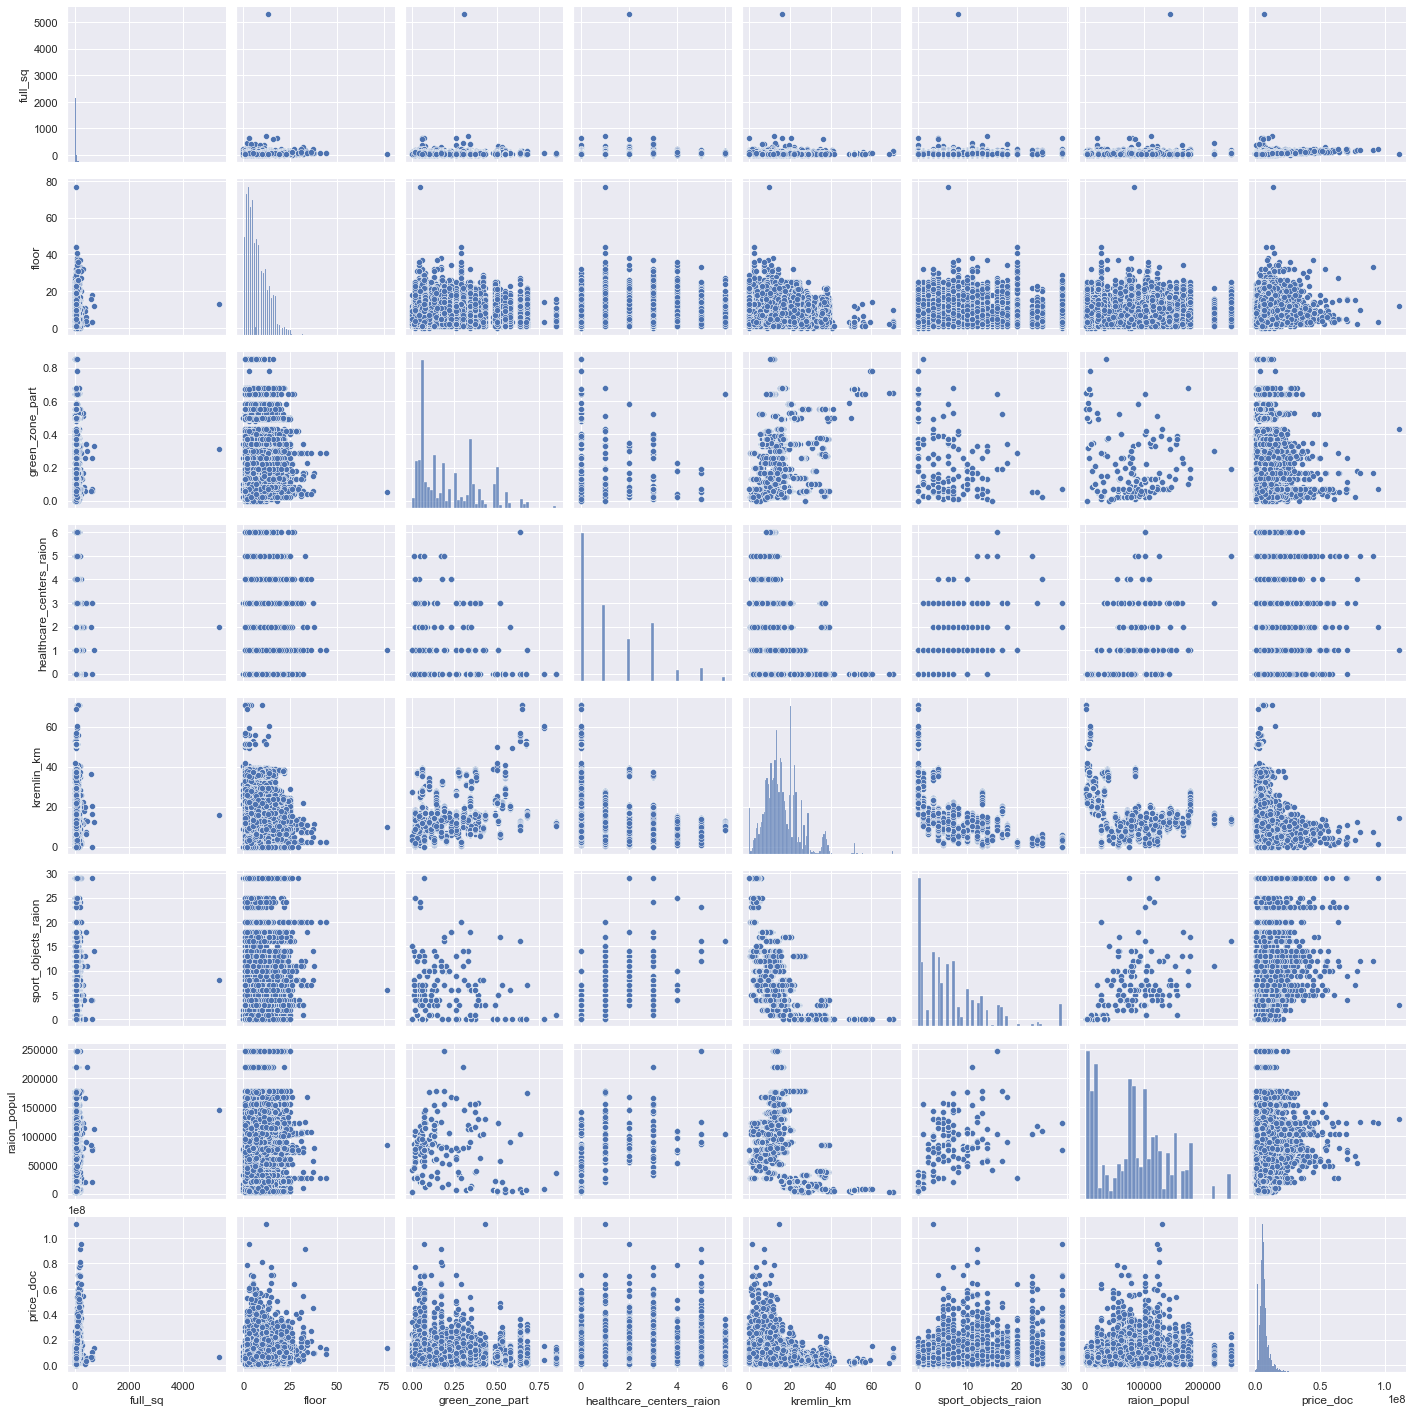

In [12]:
sns.pairplot(raw_data)

In [13]:
raw_data.describe()

,full_sq,floor,green_zone_part,healthcare_centers_raion,kremlin_km,sport_objects_raion,raion_popul,price_doc
count,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,54.214269,7.664386,0.219337,1.320895,16.045020,6.635030,84056.425552,7.123035e+06
std,38.031487,5.306094,0.175063,1.492903,8.438752,6.571982,57871.285899,4.780111e+06
min,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,2546.000000,1.000000e+05
25%,38.000000,3.000000,0.060000,0.000000,10.500000,1.000000,21819.000000,4.740002e+06
50%,49.000000,6.500000,0.170000,1.000000,14.900000,5.000000,83502.000000,6.274411e+06
75%,63.000000,11.000000,0.340000,2.000000,20.700000,10.000000,122862.000000,8.300000e+06
max,5326.000000,77.000000,0.850000,6.000000,70.700000,29.000000,247469.000000,1.111111e+08


In [14]:
raw_data.corr()

,full_sq,floor,green_zone_part,healthcare_centers_raion,kremlin_km,sport_objects_raion,raion_popul,price_doc
full_sq,1.000000,0.089085,0.031106,-0.007840,0.031160,0.028109,-0.038929,0.341840
floor,0.089085,1.000000,0.001234,-0.076201,0.045046,-0.035449,-0.046375,0.117499
green_zone_part,0.031106,0.001234,1.000000,-0.191757,0.366466,-0.239343,-0.209008,-0.095498
healthcare_centers_raion,-0.007840,-0.076201,-0.191757,1.000000,-0.458961,0.571788,0.512199,0.190006
kremlin_km,0.031160,0.045046,0.366466,-0.458961,1.000000,-0.596015,-0.397209,-0.279264
sport_objects_raion,0.028109,-0.035449,-0.239343,0.571788,-0.596015,1.000000,0.537383,0.252794
raion_popul,-0.038929,-0.046375,-0.209008,0.512199,-0.397209,0.537383,1.000000,0.151587
price_doc,0.341840,0.117499,-0.095498,0.190006,-0.279264,0.252794,0.151587,1.000000


<AxesSubplot:>

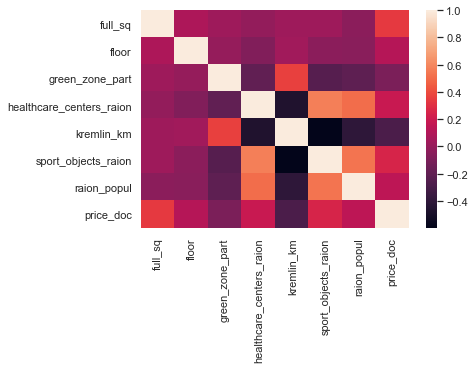

In [15]:
sns.heatmap(raw_data.corr())

C:\Users\quinn\Anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='full_sq', ylabel='Density'>

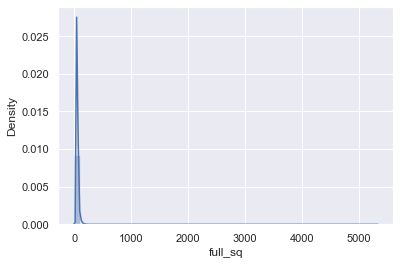

In [16]:
sns.distplot(raw_data['full_sq'])

C:\Users\quinn\Anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_doc', ylabel='Density'>

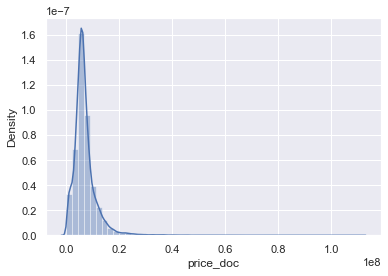

In [17]:
sns.distplot(raw_data['price_doc'])

C:\Users\quinn\Anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='floor', ylabel='Density'>

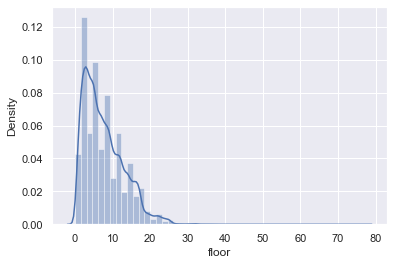

In [18]:
sns.distplot(raw_data['floor'])

C:\Users\quinn\Anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='green_zone_part', ylabel='Density'>

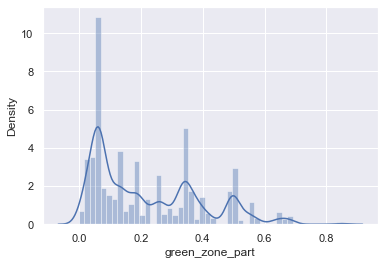

In [19]:
sns.distplot(raw_data['green_zone_part'])

C:\Users\quinn\Anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='healthcare_centers_raion', ylabel='Density'>

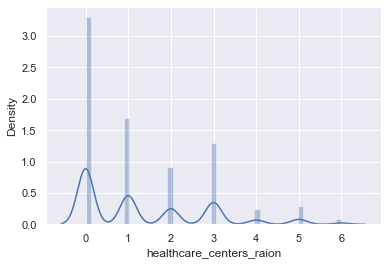

In [20]:
sns.distplot(raw_data['healthcare_centers_raion'])

C:\Users\quinn\Anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='kremlin_km', ylabel='Density'>

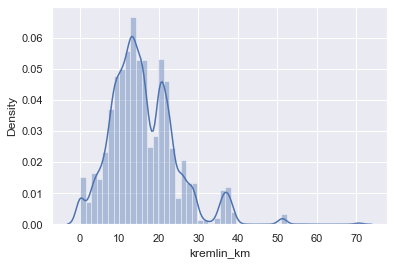

In [21]:
sns.distplot(raw_data['kremlin_km'])

C:\Users\quinn\Anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sport_objects_raion', ylabel='Density'>

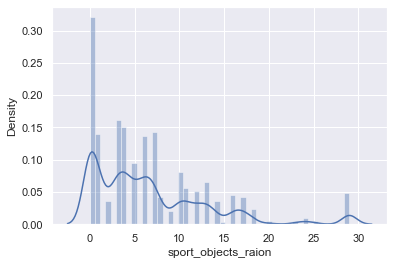

In [22]:
sns.distplot(raw_data['sport_objects_raion'])

C:\Users\quinn\Anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='raion_popul', ylabel='Density'>

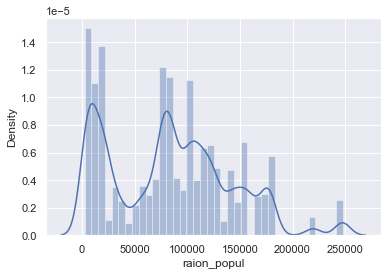

In [23]:
sns.distplot(raw_data['raion_popul'])

In [24]:
## remove top 1% of outliers

In [25]:
q=raw_data['full_sq'].quantile(.99)
data_1=raw_data[raw_data['full_sq']<q]

In [26]:
r=data_1['floor'].quantile(.99)
data_2=data_1[data_1['floor']<r]

In [27]:
s=data_2['green_zone_part'].quantile(.99)
data_3=data_2[data_2['green_zone_part']<s]

In [28]:
t=data_3['kremlin_km'].quantile(.99)
data_4=data_3[data_3['kremlin_km']<t]

In [29]:
u=data_4['price_doc'].quantile(.99)
data_5=data_4[data_4['price_doc']<u]

In [30]:
data_5.describe(include='all')

,full_sq,floor,product_type,green_zone_part,healthcare_centers_raion,kremlin_km,sport_objects_raion,raion_popul,price_doc
count,28724.000000,28724.000000,28724,28724.000000,28724.000000,28724.000000,28724.000000,28724.000000,2.872400e+04
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Investment,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,18378,NaN,NaN,NaN,NaN,NaN,NaN
mean,52.173827,7.452218,NaN,0.212048,1.326069,15.669099,6.604790,84192.348489,6.735754e+06
std,17.564332,4.902562,NaN,0.165239,1.499551,7.539068,6.507812,57783.509531,3.346458e+06
min,0.000000,0.000000,NaN,0.000000,0.000000,0.100000,0.000000,2546.000000,1.000000e+05
25%,38.000000,3.000000,NaN,0.060000,0.000000,10.500000,1.000000,21819.000000,4.740000e+06
50%,48.000000,6.000000,NaN,0.160000,1.000000,14.800000,5.000000,83502.000000,6.218370e+06
75%,62.000000,11.000000,NaN,0.340000,2.000000,20.500000,10.000000,122862.000000,8.100000e+06


In [31]:
data_cleaned=data_5.reset_index(drop=True)

In [32]:
##Check regression assumptions

Text(0.5, 1.0, 'Product Type')

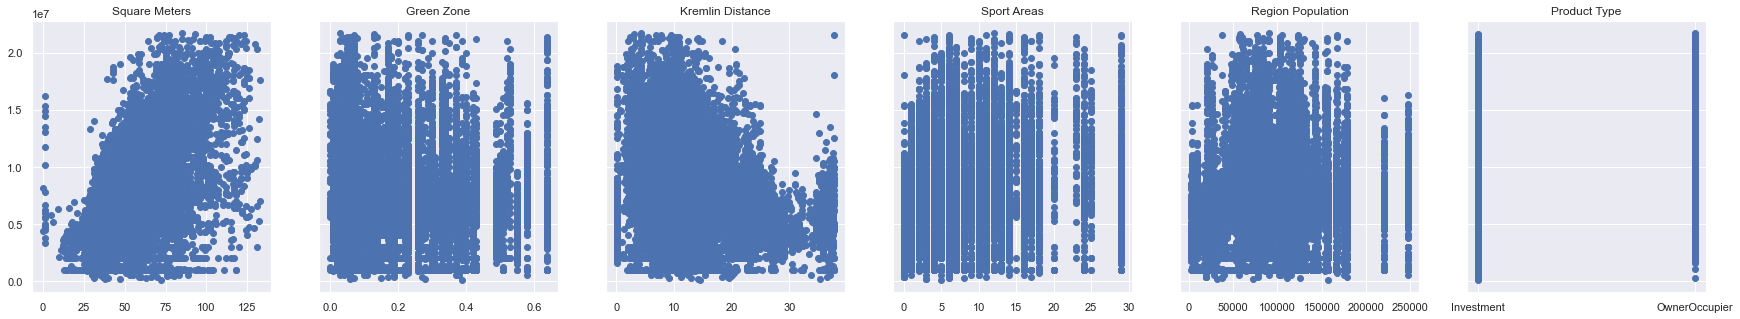

In [33]:
f, (ax1, ax2, ax3, ax4, ax5, ax6)=plt.subplots(1, 6, sharey = True, figsize=(30, 5))

ax1.scatter(data_cleaned['full_sq'], data_cleaned['price_doc'])
ax1.set_title('Square Meters')

ax2.scatter(data_cleaned['green_zone_part'], data_cleaned['price_doc'])
ax2.set_title('Green Zone')

ax3.scatter(data_cleaned['kremlin_km'], data_cleaned['price_doc'])
ax3.set_title('Kremlin Distance')

ax4.scatter(data_cleaned['sport_objects_raion'], data_cleaned['price_doc'])
ax4.set_title('Sport Areas')

ax5.scatter(data_cleaned['raion_popul'], data_cleaned['price_doc'])
ax5.set_title('Region Population')

ax6.scatter(data_cleaned['product_type'], data_cleaned['price_doc'])
ax6.set_title('Product Type')

In [34]:
#check price distribution after oulier removal

C:\Users\quinn\Anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_doc', ylabel='Density'>

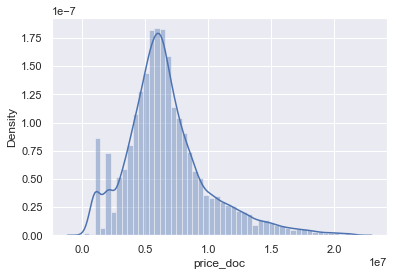

In [35]:
sns.distplot(data_cleaned['price_doc'])

In [36]:
log_price=np.log(data_cleaned['price_doc'])
data_cleaned['log_price'] = log_price

Text(0.5, 1.0, 'Region Population')

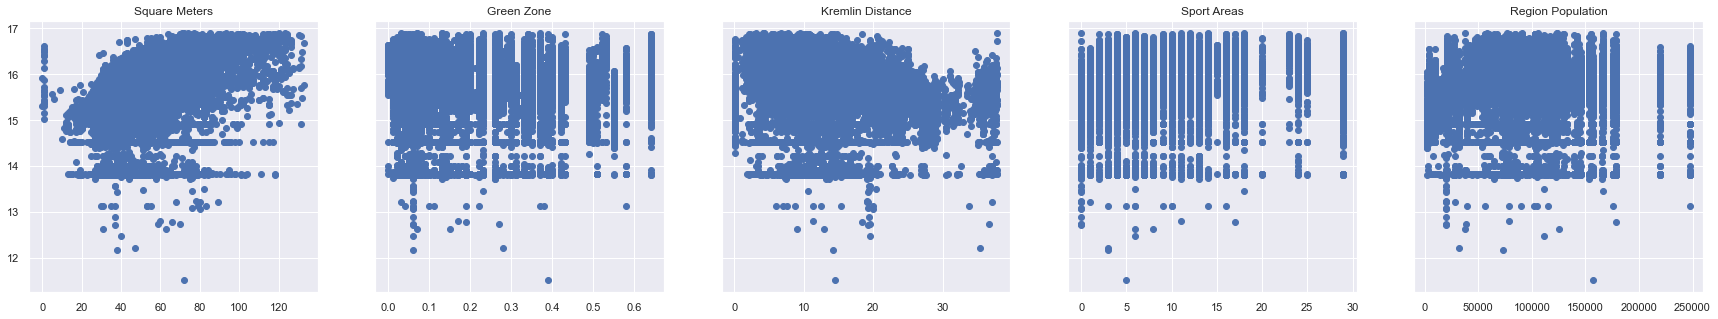

In [37]:
f, (ax1, ax2, ax3, ax4, ax5)=plt.subplots(1, 5, sharey = True, figsize=(30, 5))

ax1.scatter(data_cleaned['full_sq'], data_cleaned['log_price'])
ax1.set_title('Square Meters')

ax2.scatter(data_cleaned['green_zone_part'], data_cleaned['log_price'])
ax2.set_title('Green Zone')

ax3.scatter(data_cleaned['kremlin_km'], data_cleaned['log_price'])
ax3.set_title('Kremlin Distance')

ax4.scatter(data_cleaned['sport_objects_raion'], data_cleaned['log_price'])
ax4.set_title('Sport Areas')

ax5.scatter(data_cleaned['raion_popul'], data_cleaned['log_price'])
ax5.set_title('Region Population')

In [38]:
# only 'Square Meters' is linear due to log transformation

In [39]:
# with exception of outliers, there is no difference between the two groups in product type (ownership or investment) so drop it

In [40]:
data_cleaned.drop(['product_type'], axis = 1, inplace = True)

In [41]:
data_cleaned.columns.values

array(['full_sq', 'floor', 'green_zone_part', 'healthcare_centers_raion',
       'kremlin_km', 'sport_objects_raion', 'raion_popul', 'price_doc',
       'log_price'], dtype=object)

In [42]:
# check for multicollinearity

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned [['full_sq', 'floor', 'green_zone_part', 'healthcare_centers_raion', 
                           'kremlin_km', 'sport_objects_raion', 'raion_popul']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [44]:
vif

,VIF,features
0,7.576177,full_sq
1,3.292782,floor
2,2.999524,green_zone_part
3,2.955633,healthcare_centers_raion
4,6.403951,kremlin_km
5,3.927837,sport_objects_raion
6,4.556483,raion_popul


In [45]:
#full_sq and kremlin_km have high levels of multicollinearity. I make a judgement call to keep them in b/c area and location are
#leading indicators of price.

In [46]:
#Creating y and x variables

In [47]:
target = data_cleaned['price_doc']
inputs = data_cleaned.drop(['price_doc'], axis = 1)

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [49]:
inputs_scaled = scaler.transform(inputs)

In [50]:
#training and test sets

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size = 0.2, random_state=101)

In [53]:
#create ANN

In [54]:
ann = tf.keras.models.Sequential()

In [55]:
# input and first layer

In [56]:
ann.add(tf.keras.layers.Dense(units=10, activation = 'relu'))

In [57]:
# second layer

In [58]:
ann.add(tf.keras.layers.Dense(units=10, activation = 'relu'))

In [59]:
# output layer

In [60]:
ann.add(tf.keras.layers.Dense(units=1))

In [61]:
# compliling

In [62]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [63]:
#from tensorflow_core.python.keras.utils.data_utils import Sequence

In [64]:
#from tensorflow.keras.utils import Sequence

In [65]:
# training

In [66]:
x_train1 = np.array(x_train)

In [67]:
y_train1 = np.array(y_train)

In [68]:
x_test1 = np.array(x_test)

In [69]:
y_test1 = np.array(y_test)

In [70]:
ann.fit(x_train1, y_train1, epochs = 100)

Train on 22979 samples
Epoch 1/100
22979/22979 [==============================] - 8s 355us/sample - loss: 56675792201795.1172
Epoch 2/100
22979/22979 [==============================] - 3s 123us/sample - loss: 56657794114416.1953
Epoch 3/100
22979/22979 [==============================] - 2s 75us/sample - loss: 56600541837437.0391
Epoch 4/100
22979/22979 [==============================] - 2s 100us/sample - loss: 56493096191518.4531
Epoch 5/100
22979/22979 [==============================] - 3s 132us/sample - loss: 56328846582751.4297
Epoch 6/100
22979/22979 [==============================] - 2s 91us/sample - loss: 56103246353110.0156
Epoch 7/100
22979/22979 [==============================] - 2s 72us/sample - loss: 55813491965660.3906
Epoch 8/100
22979/22979 [==============================] - 4s 155us/sample - loss: 55446104343305.1641
Epoch 9/100
22979/22979 [==============================] - 4s 184us/sample - loss: 54993886752981.7266
Epoch 10/100
22979/22979 [===========================

22979/22979 [==============================] - 3s 113us/sample - loss: 1308186276517.8835
Epoch 80/100
22979/22979 [==============================] - 3s 115us/sample - loss: 1266371431695.9646
Epoch 81/100
22979/22979 [==============================] - 2s 92us/sample - loss: 1228217324315.1719
Epoch 82/100
22979/22979 [==============================] - 3s 128us/sample - loss: 1192555636602.7583
Epoch 83/100
22979/22979 [==============================] - 3s 138us/sample - loss: 1159102285334.6155
Epoch 84/100
22979/22979 [==============================] - 2s 93us/sample - loss: 1128142338618.6665
Epoch 85/100
22979/22979 [==============================] - 2s 82us/sample - loss: 1099372961879.3424
Epoch 86/100
22979/22979 [==============================] - 2s 93us/sample - loss: 1072689413140.9889
Epoch 87/100
22979/22979 [==============================] - 2s 83us/sample - loss: 1047801019174.6691
Epoch 88/100
22979/22979 [==============================] - 2s 79us/sample - loss: 10244824

In [71]:
y_pred = ann.predict(x_test1)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test1.reshape(len(y_test1),1)),1))

[[7058543.5  6940000.  ]
 [8306858.   7579575.  ]
 [7393287.   5900000.  ]
 ...
 [2958375.   3445200.  ]
 [3738629.25 3196725.  ]
 [6010449.   5909900.  ]]


In [72]:
#Plotting Residuals

C:\Users\quinn\Anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

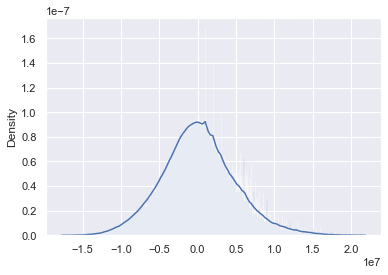

In [74]:
sns.distplot((y_test1-y_pred), bins=2000)

In [75]:
from sklearn import metrics
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test1, y_pred)))

RMSE 893538.7613488826


In [77]:
metrics.explained_variance_score(y_test1,y_pred)

0.9295284774953289